In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 2: Load Dataset
# We'll use the Iris dataset available in scikit-learn.
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier analysis
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=list(iris['feature_names']) + ['target'])
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# Step 3: Split Dataset
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 4: Preprocess Data
# Standardize the features by scaling them.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Step 5: Train the Model
# We'll use the Support Vector Machine (SVM) algorithm with an RBF kernel.
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [7]:
# Step 6: Make Predictions
# Use the trained model to make predictions on the test set.
y_pred = svm_model.predict(X_test)

In [8]:
# Step 7: Evaluate the Model
# Evaluate the performance of the model using various metrics.
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Classification Report:')
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



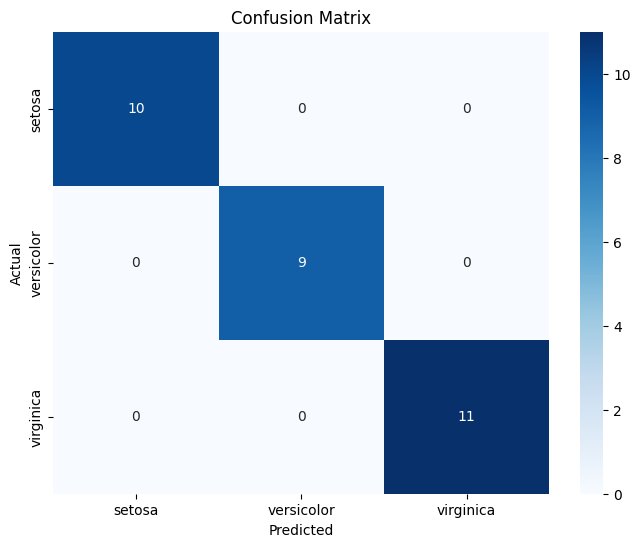

In [9]:
# Step 8: Visualize Results
# Visualize the confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


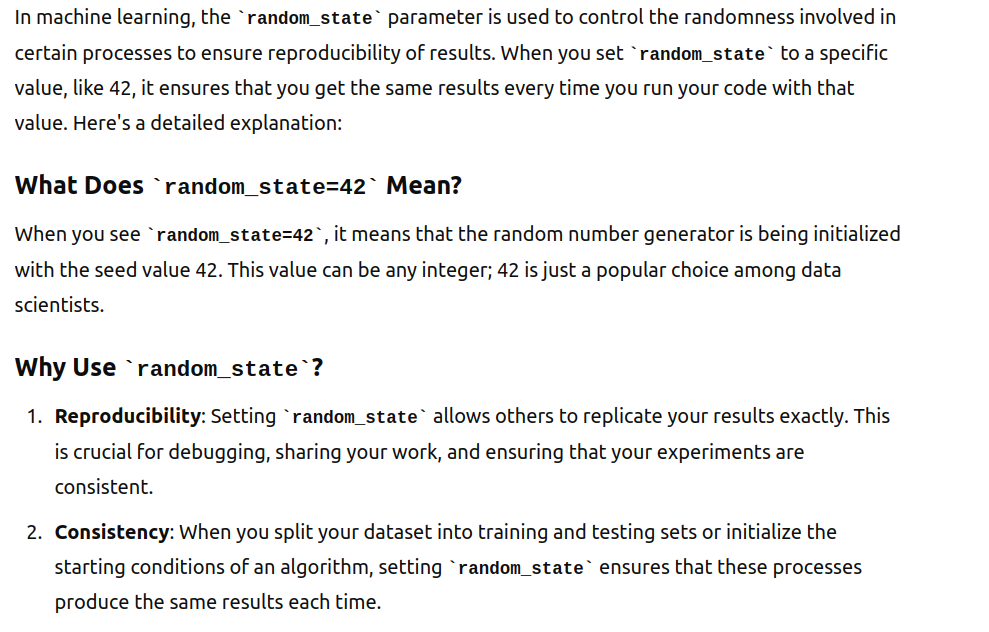